In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
df=pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#statical summery
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


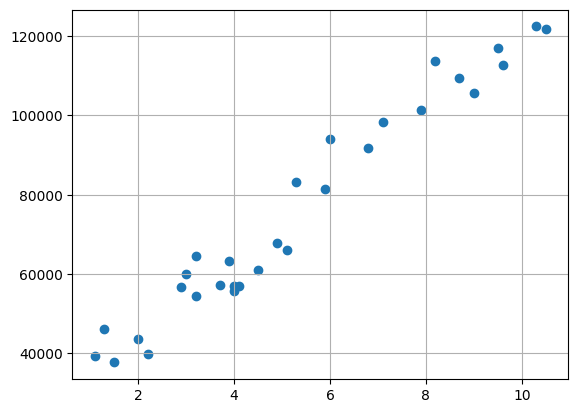

In [5]:
#DATA visualization
plt.scatter(x='YearsExperience',y='Salary',data=df)
plt.grid()

In [6]:
#feature converting into array
X=df["YearsExperience"]
y=df["Salary"]
X=np.array(X)
y=np.array(y)

In [7]:
X=X.reshape(-1,1)
print(X.shape)
y=y.reshape(-1,1)
print(y.shape)


(30, 1)
(30, 1)


In [8]:
#Spliting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


In [9]:
#traning the model
from sklearn.linear_model import LinearRegression
regr=LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)
print("linear model coefficient(w):",regr.coef_)
print("linear model intercept(b):",regr.intercept_)

linear model coefficient(w): [[9697.19955196]]
linear model intercept(b): [24517.18397594]


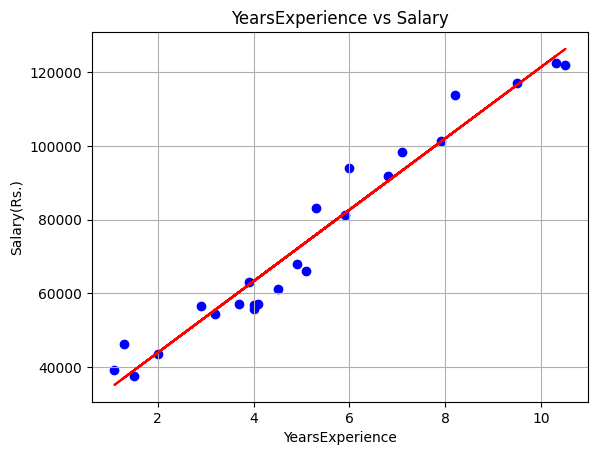

In [10]:
#fitting the line 
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train+regr.intercept_,'r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary(Rs.)")
plt.title("YearsExperience vs Salary")
plt.grid()

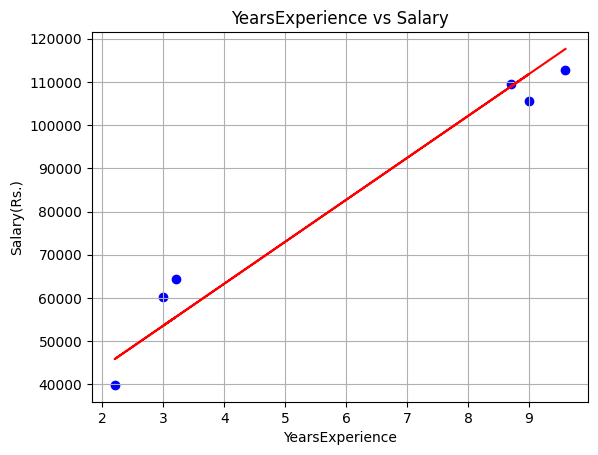

In [11]:
#testing model
plt.scatter(X_test,y_test,color='blue')
y_pred=regr.predict(X_test)
plt.plot(X_test,y_pred,color='r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary(Rs.)")
plt.title("YearsExperience vs Salary")
plt.grid()

In [12]:
from sklearn.metrics import r2_score
print("mean absolute error:%.2f"%np.mean(np.absolute(y_pred-y_test)))
print("residual sum of squre(mse):%.2f"%np.mean(y_pred-y_test)**2)
print("r2 score:%.2f"%r2_score(y_pred,y_test))

mean absolute error:5521.91
residual sum of squre(mse):37321.59
r2 score:0.96


In [13]:
#using trained model to predict the salary
temp=np.array([2])
temp=temp.reshape(-1,1)
salary=regr.predict(temp)
print("salary prediction=Rs",salary)


salary prediction=Rs [[43911.58307986]]
